# Importaciones

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Importar los datos
PRESA01 = pd.read_csv("datos/SA_DATA.csv")
PREDHS = pd.read_csv("datos/DHS_DATA.csv")
# Colores
colores = ['#BF808C', '#605373', '#F2C299', '#F2AD94', '#F29C94']


# Limpieza de los Datos 🧹

In [14]:
INDEX = PRESA01.drop(0)
SA01 = INDEX.drop(columns=["GHO (URL)", "DIMENSION (TYPE)",  "DIMENSION (CODE)", "DIMENSION (NAME)", "Low", "High"])
SA01.head(20)
PREDHS.drop(index=0, inplace=True)
DHS = PREDHS.drop(columns=["RegionId", "LevelRank", "SurveyId", "IndicatorId", "IndicatorOrder"])


# Análisis de Datos 📊

## Vista General 👁‍🗨

### Camas por Año 🛏

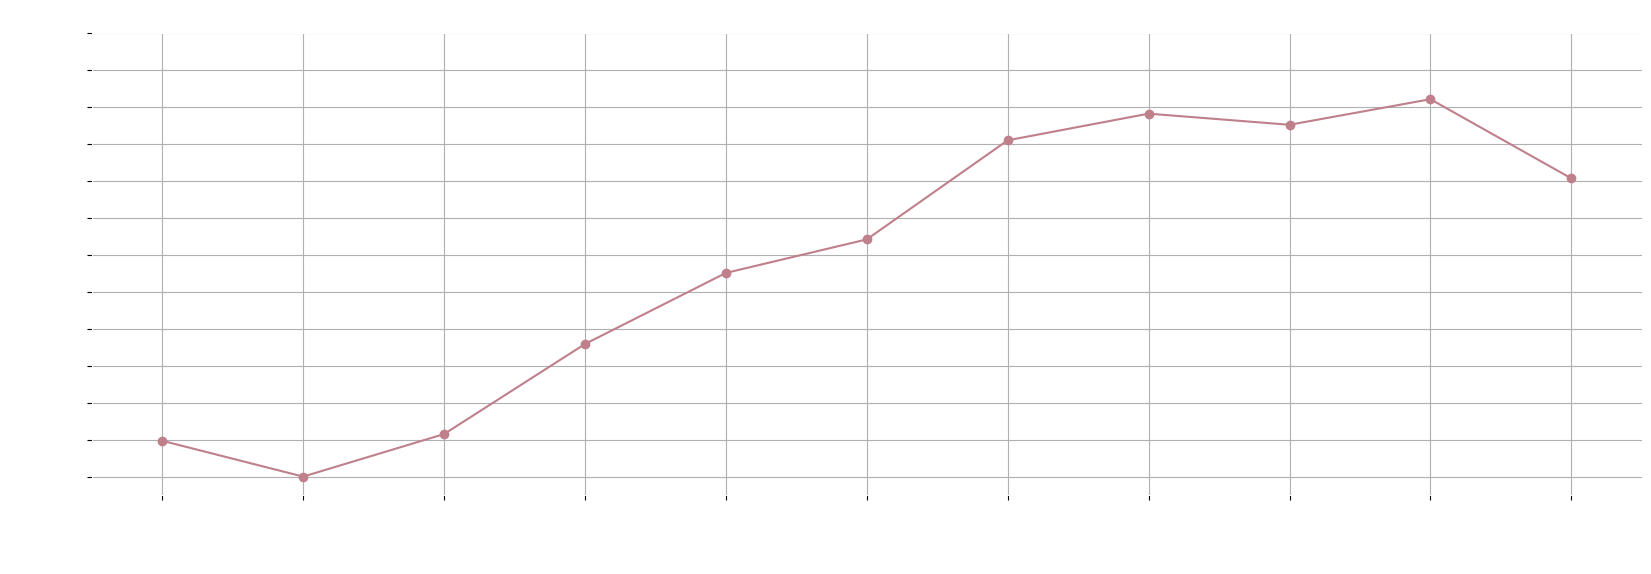

In [15]:
año_camas_sum = SA01.groupby("STARTYEAR")["Numeric"].sum()
año_camas_sum = pd.to_numeric(año_camas_sum, errors='coerce')

plt.figure(figsize=(20, 6))
plt.plot(año_camas_sum.index, año_camas_sum.values, marker='o', linestyle='-', color=colores[0])

plt.gcf().patch.set_facecolor('none')  
plt.gca().patch.set_facecolor('none')
plt.gca().spines['top'].set_color('white')  
plt.gca().spines['right'].set_color('white')  
plt.gca().spines['bottom'].set_color('white')  
plt.gca().spines['left'].set_color('white')  

plt.title('Suma de los valores por año', fontsize=16, color='white')
plt.xlabel('Año', fontsize=12, color='white')
plt.ylabel('Camas', fontsize=12, color='white')

plt.xticks(rotation=90, color='white')
plt.yticks(color='white')

plt.grid(True)
plt.yticks(np.arange(min(año_camas_sum.values), max(año_camas_sum.values) + 0.5, 0.25))

plt.show()

### Indicadores


C:\Users\Iris\AppData\Local\Temp\ipykernel_9844\3716979456.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))
C:\Users\Iris\AppData\Local\Temp\ipykernel_9844\3716979456.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  grafico.show()


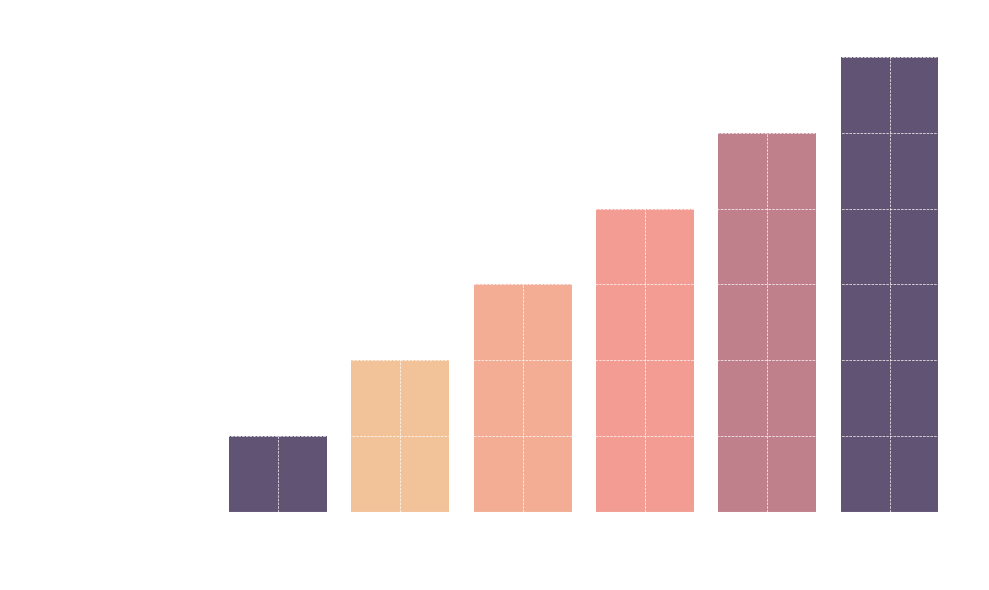

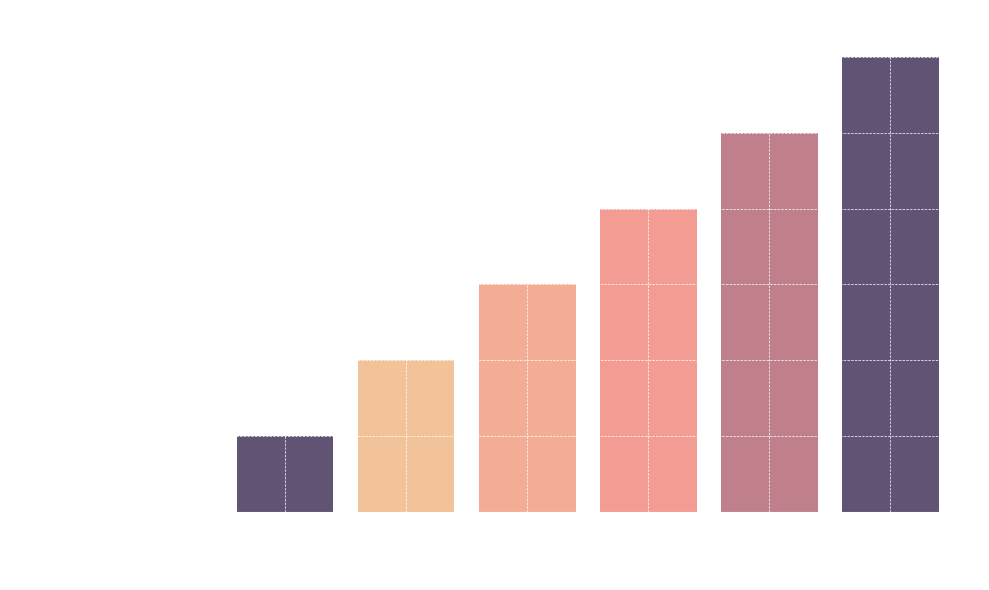

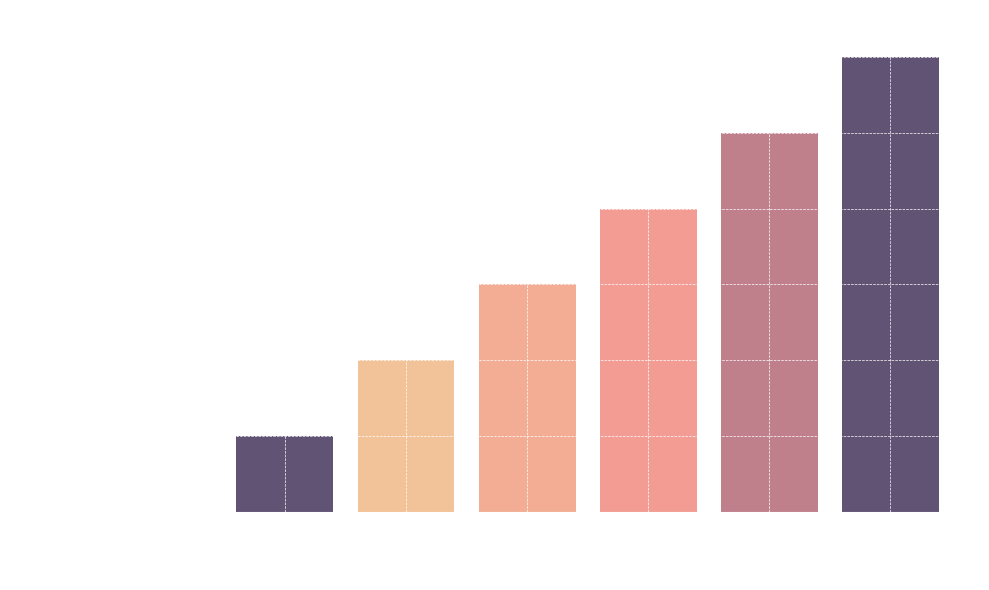

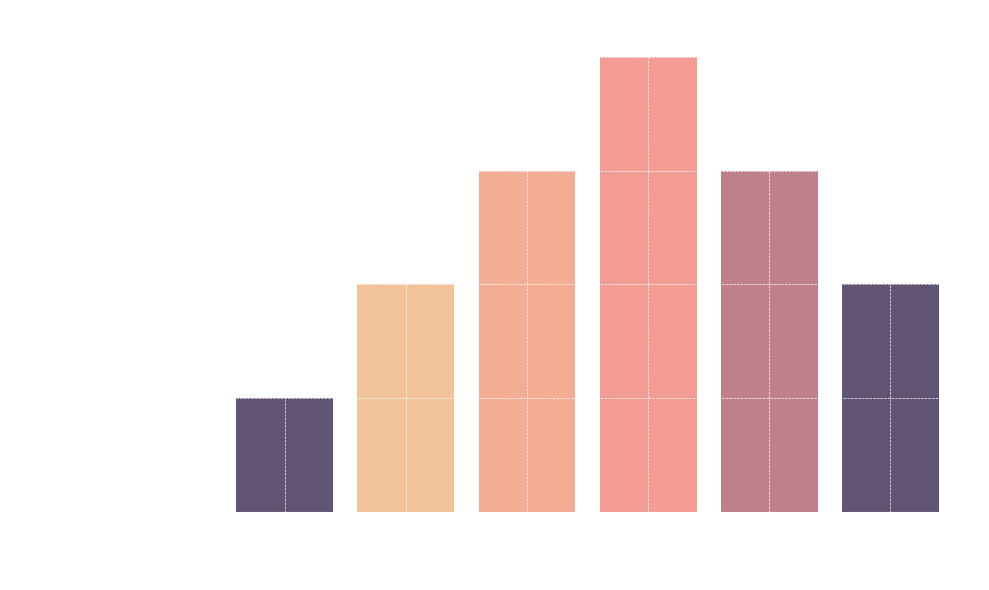

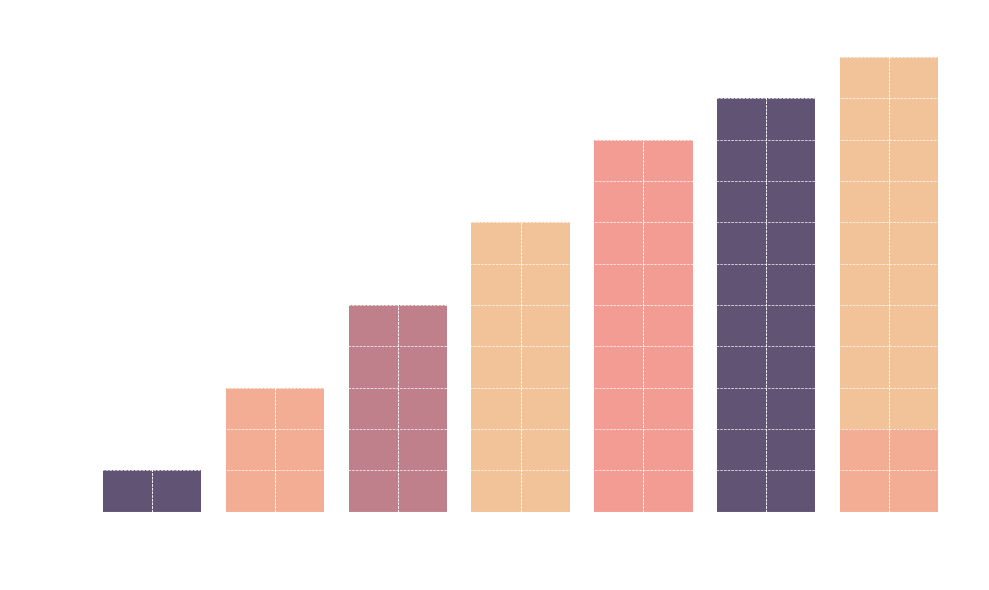

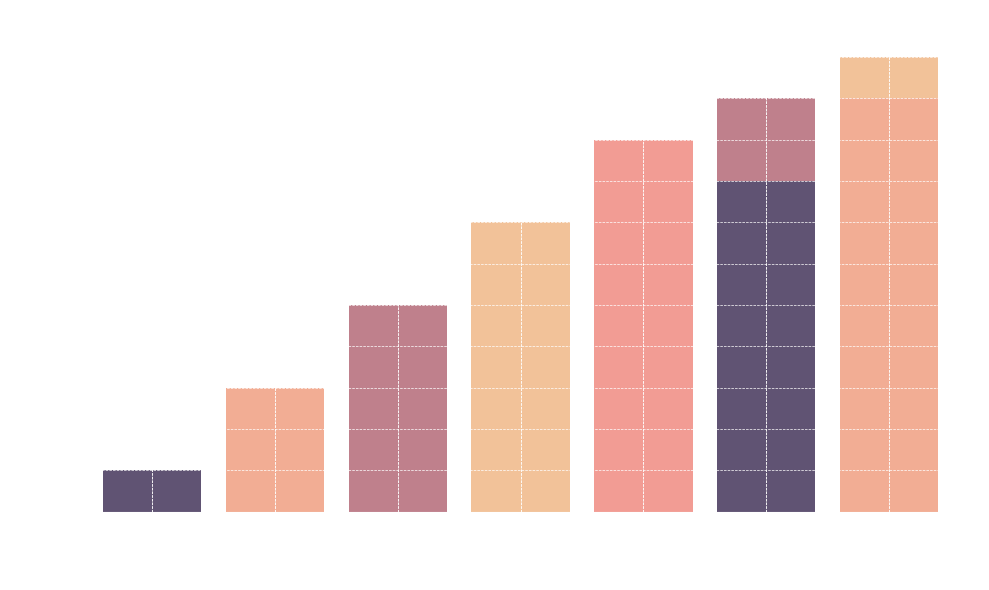

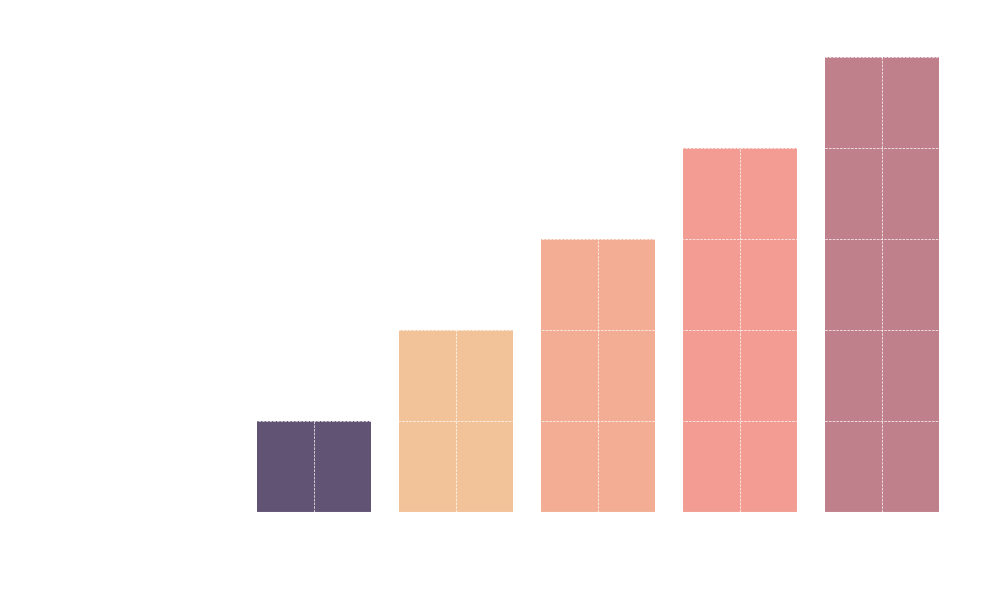

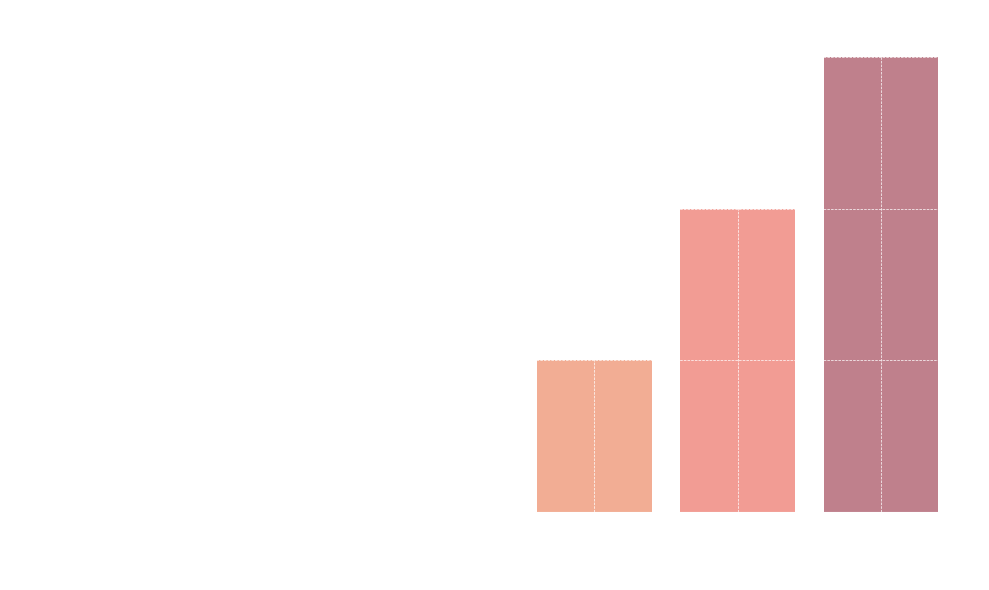

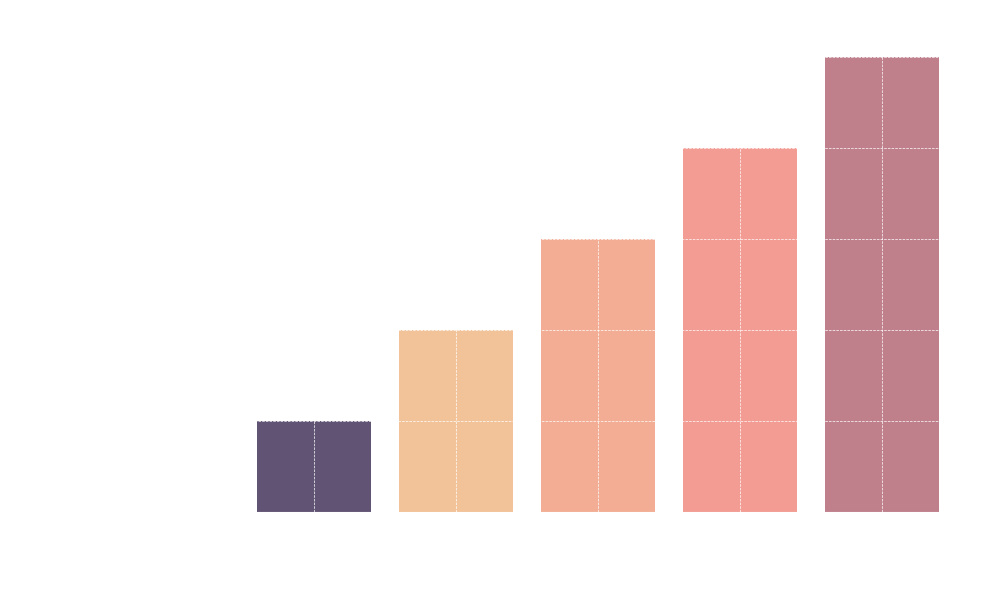

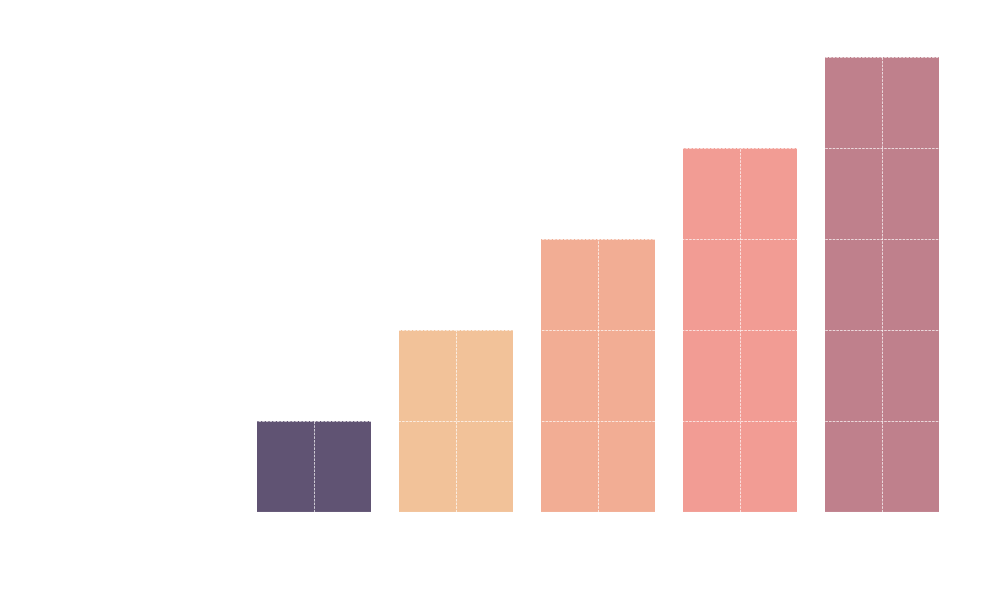

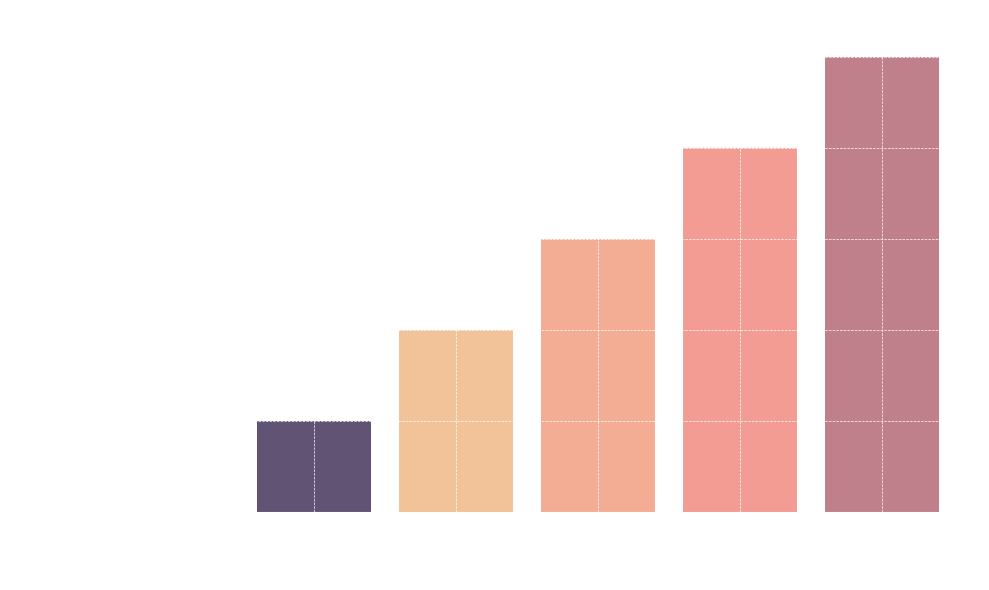

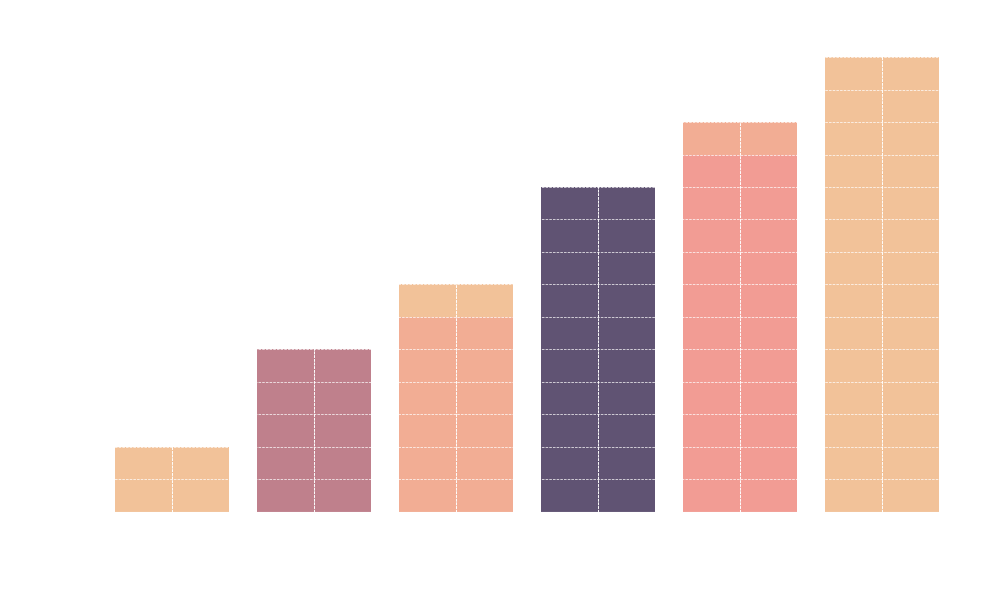

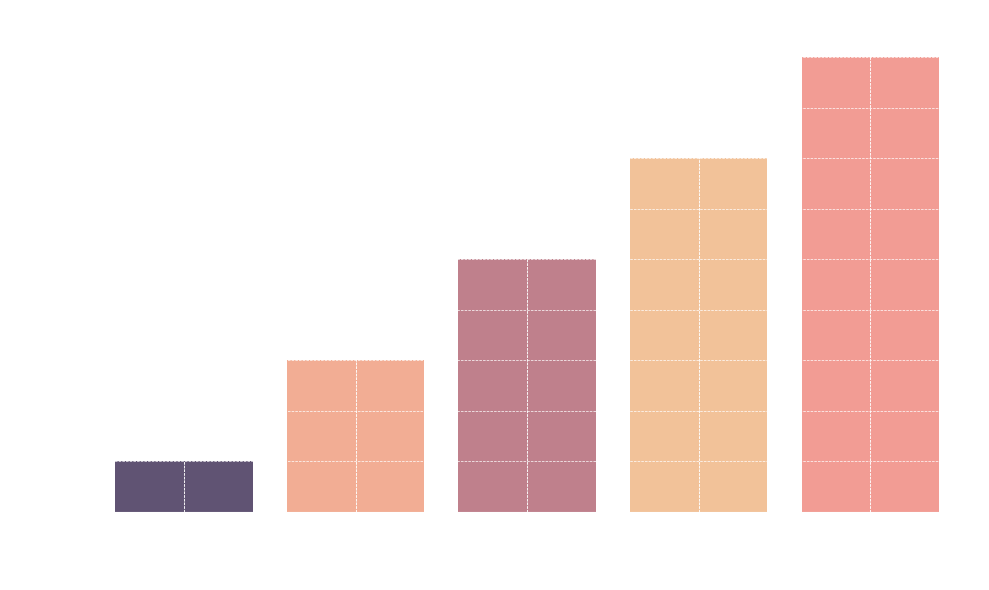

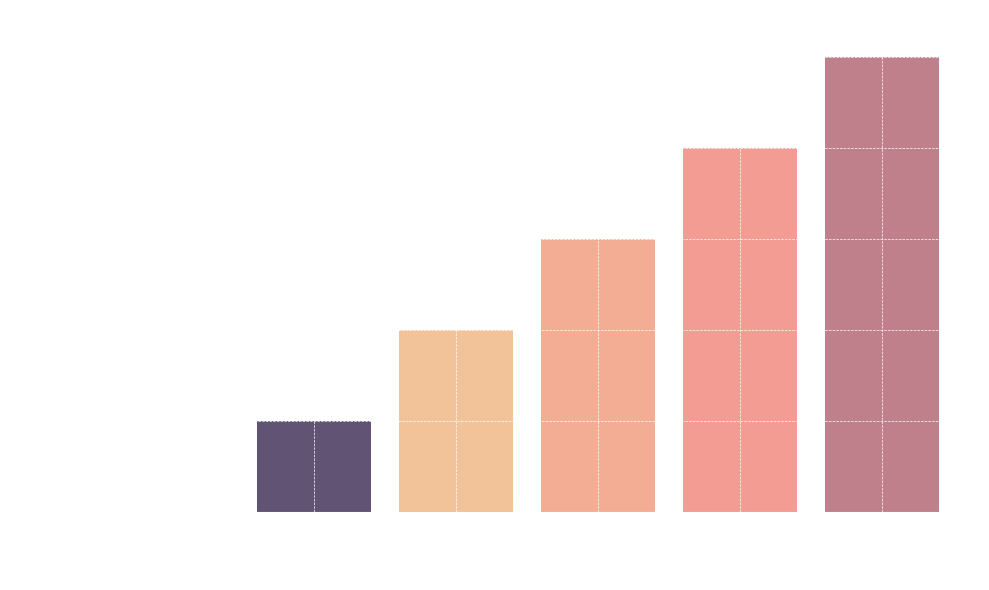

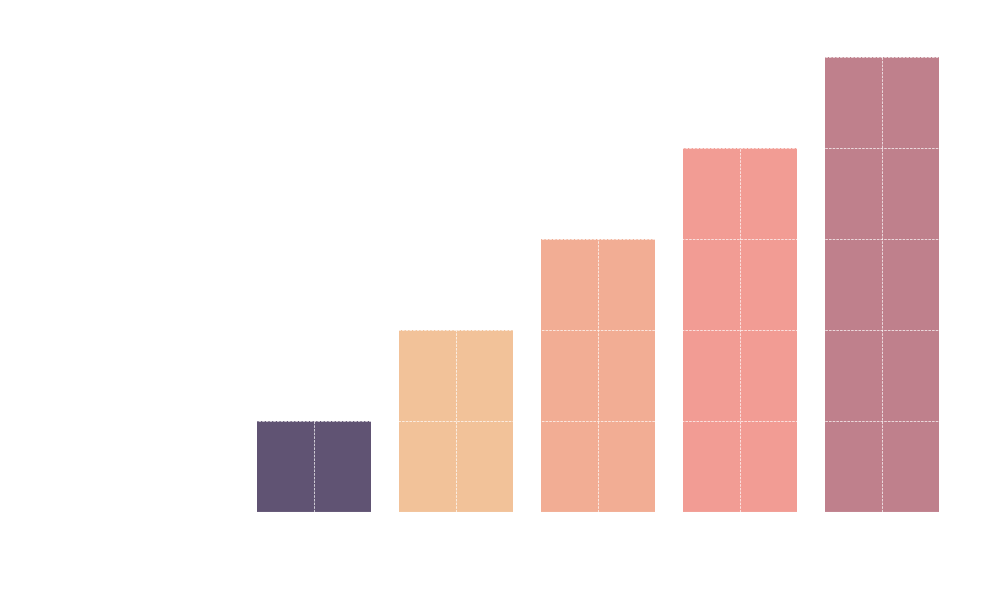

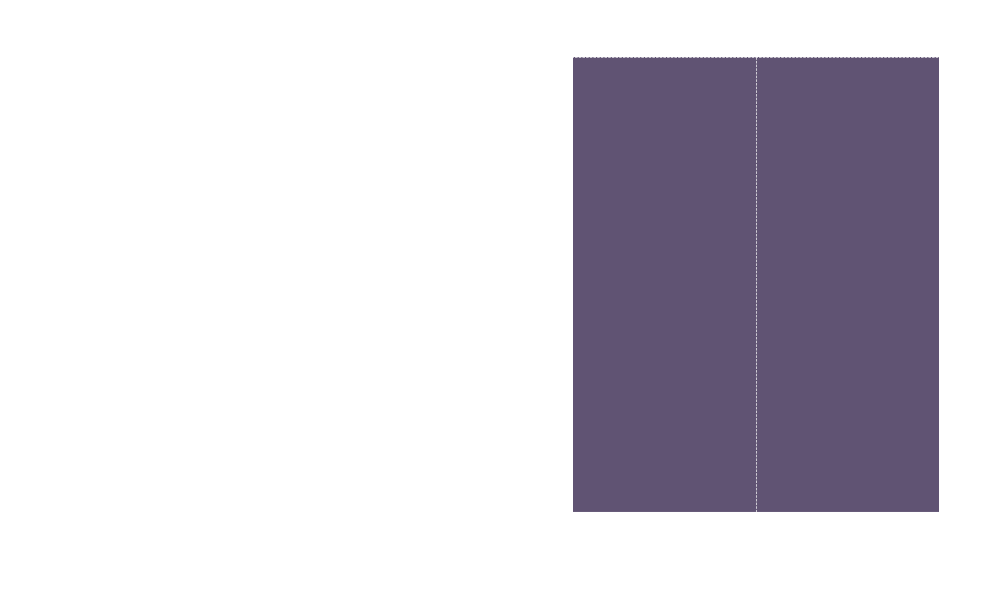

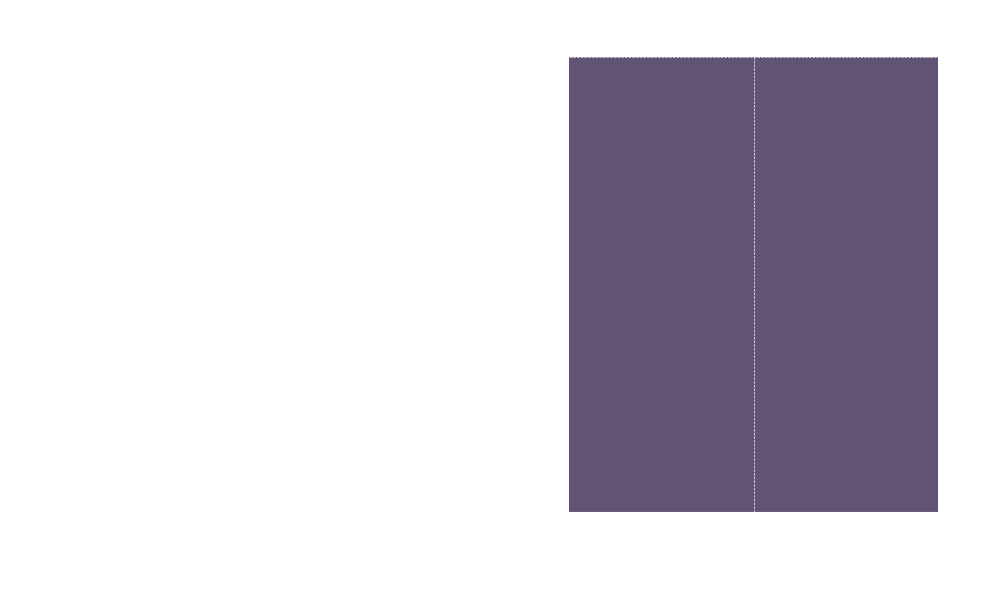

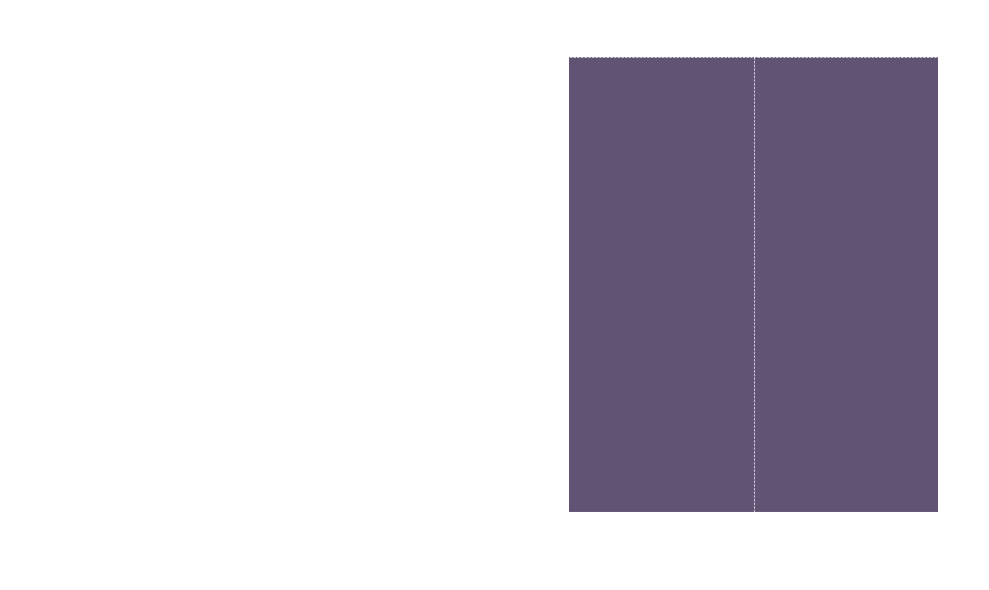

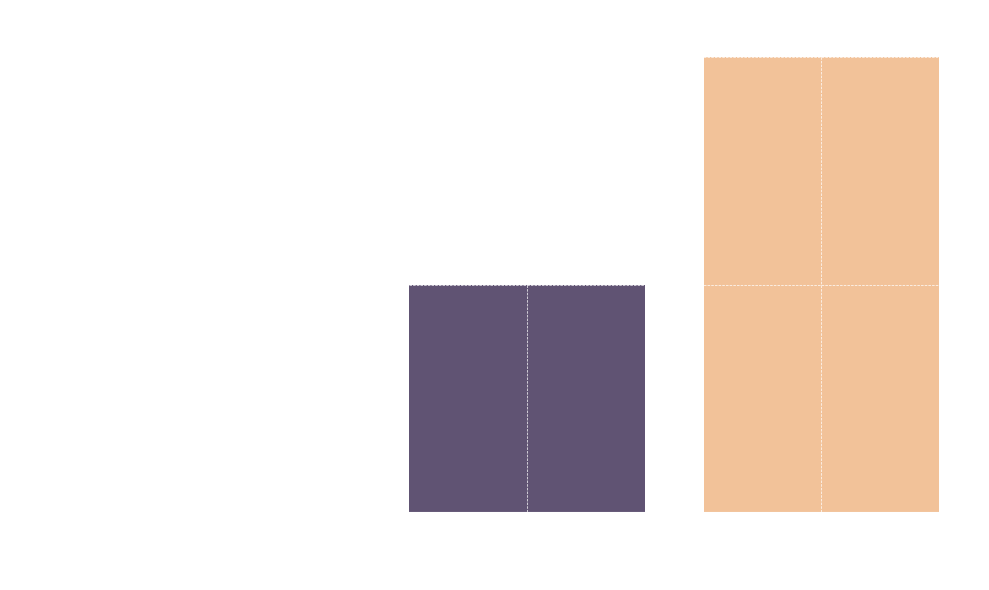

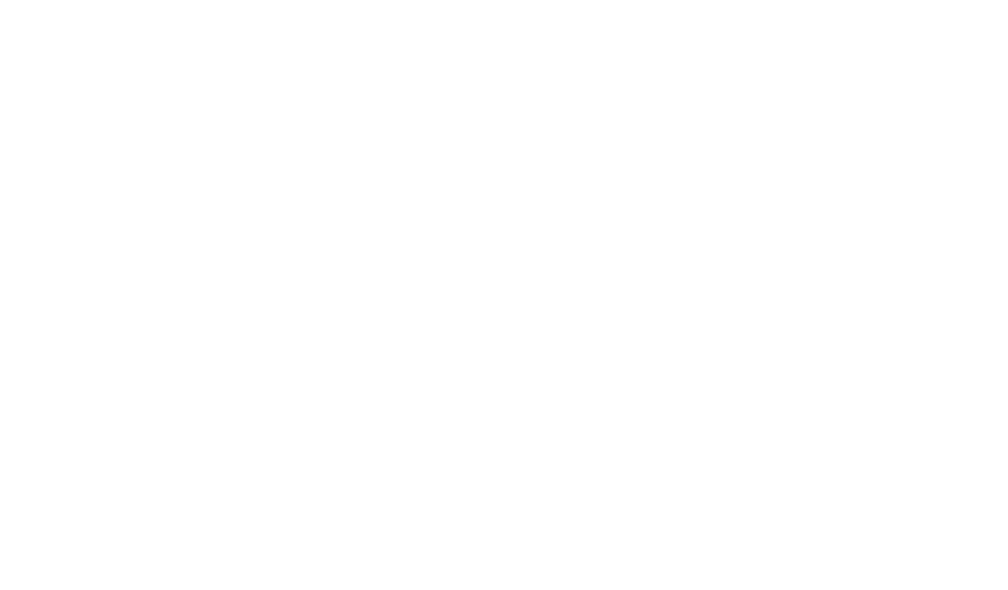

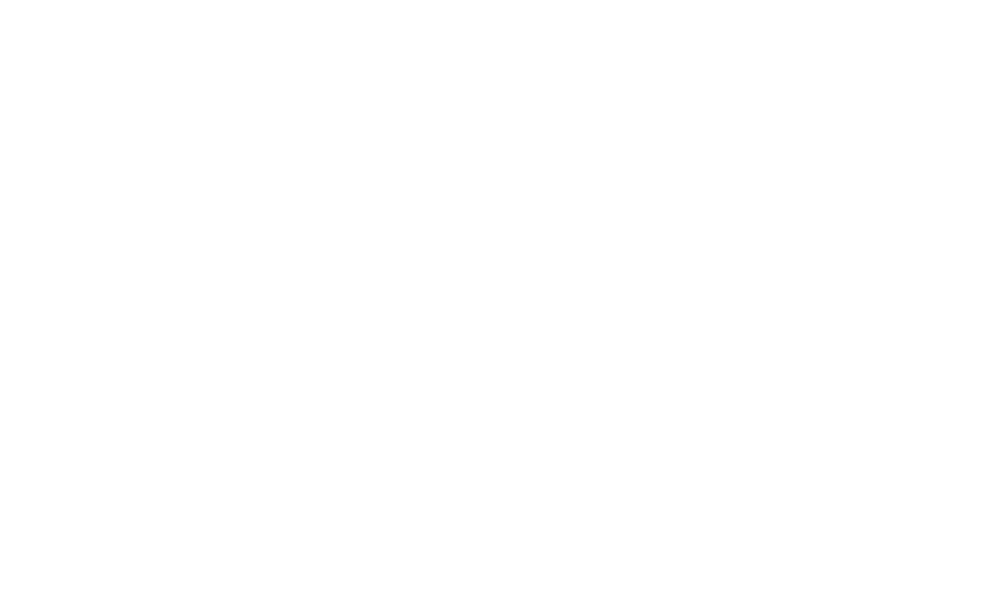

In [16]:
indicadores = DHS["Indicator"].unique()
graficos = []

for indicador in indicadores:
    indicadoresfilt = DHS[DHS['Indicator'] == indicador]
    
    plt.figure(figsize=(10,6))
    plt.bar(indicadoresfilt['SurveyYear'], indicadoresfilt['Value'], color=colores)
    
    plt.gca().set_facecolor('none')
    plt.gca().spines['top'].set_color('white')  
    plt.gca().spines['right'].set_color('white') 
    plt.gca().spines['left'].set_color('white')  
    plt.gca().spines['bottom'].set_color('white')
    plt.gcf().patch.set_facecolor('none')
    plt.gca().tick_params(axis='x', colors='white') 
    plt.gca().tick_params(axis='y', colors='white')  
    plt.gca().grid(True, color='white' , linestyle='--', linewidth=0.5)  
    
    plt.title(f'{indicador} por Año', fontsize=16, color='white')
    plt.xlabel('Año', fontsize=12, color='white')
    plt.ylabel(indicador, fontsize=12, color='white') 

    plt.xticks(indicadoresfilt['SurveyYear'], rotation=45)
    plt.tight_layout()
    
    graficos.append(plt.gcf())

for grafico in graficos:
    grafico.show()

## 🏥 Análisis de la Evolución de las Enfermedades Crónicas en Colombia

In [17]:
# Prueba

print("Prueba de ejecución exitosa")

Prueba de ejecución exitosa


prueba 2